# AFFLUENT FILMS AT BOX OFFICE : CASE STUDY MICROSOFT


## 1. Business Understanding

Microsoft is  a technology corporation best known for software products such as Windows operating system. The company would like to create a movie studio due to the trending original video creation. In order to do this,the company needs to know the type of films that are currently doing the best at box office. 

This project will extract the relevant data and provide insight on the trending films by providing meaningfull visualizations. It will also recommend on the type of films the company should venture into. The project will also show the budget associated with each film and recommend on whether or not the company should venture into that film. The project will also recommend on whether or not the company should venture into filming at all based on the net returns of the films.

## 2.Data Understanding

The data used in this project was extracted from [IMDb](https://www.imdb.com/) ,[Box Office Mojo](https://www.boxofficemojo.com/) ,[The Numbers](https://www.the-numbers.com/) ,[TheMovieDB](https://www.themoviedb.org/).

The dataset from Box Office Mojo contains the gross income of each movie,both domestic and foreign and the year it was released. This helps in determining the income generated from each movie. This dataset contains 3387 rows and 5 columns.

The IMDb website contained multiple datasets. The following datasets were extracted:
- crew dataset : This dataset contains the movie ids and their corresponding directors and writters. It can be joined with other datasets to yield important information such as which directors direct movies with the highest  ratings ?

- title and ratings dataset : This dataset contains the code names of movies their rating and number of people who voted. It can be of use to determine whether a certain film was popular(loved) or hated.

- title and basics dataset : This dataset contains the names and code names of movies and their genres. 

The dataset extracted from The Numbers website contains the names of movies and their associated budgets as well as the domestic and worldwide gross. It can help determine losses associated with each movie as well as the profits.

The dataset extracted from TheMovieDB contains several columns that can be of great use to this project. It will help us answer questions such as which genres had the highest rating ?

The project will use these datasets to come up with the insights and relevant recommendations.

##  3.Data preparation

### Importing the relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
sns.set()

### Loading and exploring the various data sets

In [2]:
# Loading the box office mojo datasets
bom_data_set = pd.read_csv('bom.movie_gross.csv.gz')
bom_data_set.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
# loading the imdb title and basics dataset
title_basics = pd.read_csv('imdb.title.basics.csv.gz')
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [4]:
# Loading the imdb title and ratings dataset
ratings_df= pd.read_csv('imdb.title.ratings.csv.gz')
ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [5]:
# Loading the crew dataset from imdb
crew_df= pd.read_csv('imdb.title.crew.csv.gz')
crew_df.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [6]:
# Loading the movies_df from TheMovieDB
tmdb_df =pd.read_csv('tmdb.movies.csv.gz')
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [7]:
#Loading the dataset from The Numbers
numbers_df = pd.read_csv('tn.movie_budgets.csv.gz')
numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


###  Data wrangling

### Checking for missing values and duplicates in each dataset

In [8]:
# Determining whether bom dataset has missing values 
bom_data_set.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

It can be seen that the column 'studio' 5 missing values,'foreign_gross' column has 1350 missing values and 'domestic_gross' has 28 missing values. 

In [9]:
# CHecking the shape of the data set to determine the number of rows(length of the data set)
bom_data_set.shape

(3387, 5)

In [10]:
# checking the percentage of missing values in the 'domestic_gross' column
miss = bom_data_set['foreign_gross'].isna().sum() # calculates the number of missing values in the column
total_rows = len(bom_data_set)  # length ot the series
miss_p = (miss/total_rows)* 100 # percentage of missing values
miss_p

39.85828166519043

The number of missing values in the bom dataset is too high to be dropped. However the numbers_df containing the dataset from The Numbers contains almost similar information.

In [11]:
# Exploring the numbers_df for missing values
numbers_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

The dataset contains no missing values

In [12]:
# Exploring the data types in the numbers_df 
numbers_df.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

The data types are as anticipated.

In [13]:
# Checking for duplicates in the numbers_df dataset
# setting the subsets to release_date and movies.. a movie might have the same name but different release dates
numbers_df.duplicated(subset = ['release_date','movie']).sum() 

0

The numbers_df dataset has no duplicates.

In [14]:
# Checking whether the ratings_df has missing values
ratings_df.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

The dataset has no missing values

In [15]:
# Checking the data types in the ratings_df
ratings_df.dtypes

tconst            object
averagerating    float64
numvotes           int64
dtype: object

The data types are as expected..numeric

In [16]:
# checking for duplicates
# Subset is set to tconst i.e title ids
ratings_df.duplicated(subset = 'tconst').sum()

0

The ratings_df has no duplicates

In [17]:
# Checking for missing values the title_basics dataset
title_basics.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [18]:
# checking the shape of the title_basics dataset
title_basics.shape

(146144, 6)

The 'runtime_minutes' column contains the highest number of missing values. Dropping this column might limit the scope of our research. It would be wise to replace the missing values in the dataset with a measure of central tendecy. We will use the median since it is least affected by outliers

In [19]:
# Replacing null run_rime rows in the title_basics dataframe with the median
title_basics['runtime_minutes'].fillna(title_basics['runtime_minutes'].mean(),inplace = True)
title_basics.isna().sum()

tconst                0
primary_title         0
original_title       21
start_year            0
runtime_minutes       0
genres             5408
dtype: int64

The remaining missing rows with missing values in the title_basics dataframe can be dropped..They do not form a large part of the dataset.

In [20]:
title_basics.dropna(inplace = True)
title_basics.isna().sum() # Checking for missing values to confirm

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [21]:
title_basics.shape # Checking the shape of the dataframe

(140734, 6)

In [22]:
# checking for duplicates in the title_basics dataset
# Setting the subset to tconst...title ids should be unique
title_basics.duplicated(subset = 'tconst').sum()

0

The title_basics dataset contains no duplicates

In [23]:
# Checking the data types of the title_basics dataset
title_basics.dtypes

tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object

The data types are as expected

In [24]:
# Checking for missing values in the crew_df
crew_df.isna().sum()

tconst           0
directors     5727
writers      35883
dtype: int64

In [25]:
crew_df.shape

(146144, 3)

The 'writers' column in the crew_df contains a large number of missing values. The project can still work with the directors to provide any insight concerning the personnel. The column can therefore be dropped.The 'directors' column contains a small number of missing values compared to the large number of rows (146144). the missing values can be dropped since it is a small portion of the dataset.

In [26]:
# Dropping the 'writers' column from crew_df
crew_df.drop('writers',axis = 1,inplace = True)
crew_df.shape # checking the number of columns

(146144, 2)

In [27]:
# Removing the missing values from the 'directors' column
crew_df.dropna(inplace = True)
crew_df.isna().sum() #checking for missing values

tconst       0
directors    0
dtype: int64

The dataset now has no missing values

In [28]:
# Checking for duplicates in the crew_df
# Subset is set to the movie ids i.e tconst
crew_df.duplicated(subset = 'tconst').sum()

0

The crew dataset contains no duplicates

In [29]:
# Checking the data types in the crew_df
crew_df.dtypes

tconst       object
directors    object
dtype: object

The data types of the two remaining columns are as expected

In [30]:
# Checking for missing values in the tmdb_df 
tmdb_df.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

The dataset has no missing values

In [31]:
# Checking for duplicates in the tmdb_df
# Setting subset to id since they should be unique
tmdb_df.duplicated(subset ='id').sum()

1020

In [32]:
# Checking the number of unique values...items with duplicates will have a frequency greater than one
tmdb_df['id'].value_counts()

380718    3
292086    3
402448    3
192137    3
514791    3
         ..
174376    1
221791    1
160165    1
250251    1
309885    1
Name: id, Length: 25497, dtype: int64

In [33]:
# Filtering to obtain the datasets that have an id of 380718
tmdb_df[tmdb_df['id'] ==380718 ]

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
17256,17256,"[12, 35, 18, 10770]",380718,en,The Ultimate Legacy,0.6,2015-12-04,The Ultimate Legacy,3.8,6
20494,20494,"[12, 35, 18, 10770]",380718,en,The Ultimate Legacy,0.6,2015-12-04,The Ultimate Legacy,3.8,6
23724,23724,"[12, 35, 18, 10770]",380718,en,The Ultimate Legacy,0.6,2015-12-04,The Ultimate Legacy,3.8,6


From the data_set above it can be stated that the movies with the same id are the same since the release_dates are also the same.

In [34]:
# Droping the duplicates based on the id
tmdb_df.drop_duplicates(subset = 'id',inplace = True)
tmdb_df.duplicated(subset ='id').sum() # Checking for duplicates

0

In [35]:
# Dropping the 'Unnamed: 0' columns from the tmdb_df
tmdb_df.drop('Unnamed: 0',axis = 1,inplace =  True)

In [36]:
# Checking the data types in tmdb_df
tmdb_df.dtypes

genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
dtype: object

The data types match the expectations for each column

### Checking for placeholders 

We will observe the descriptive statistics of the various datasets...most place holders are ususally values that are peculiar in a dataset for instance having an year as 2500.

In [37]:
# Checking for placeholders in title_basics dataset
title_basics.describe()

,start_year,runtime_minutes
count,140734.000000,140734.000000
mean,2014.613945,86.246507
std,2.735566,149.934119
min,2010.000000,1.000000
25%,2012.000000,75.000000
50%,2015.000000,86.187247
75%,2017.000000,95.000000
max,2115.000000,51420.000000


The start_year has a maximum value of 2115..This is not normal since we are not even in that century. It can also be observed that the minimum and maximum runtime_minutes are 1 and 51420. It is wise to research further on the movies containing these runtime_minutes. 
- Dealing with the start_year column:

In [38]:
# Checking the title_basics to see what start_year represents
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,86.187247,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy"


From the IMDb website [here](https://www.imdb.com/title/tt0063540/releaseinfo/) it can be seen that the movie Sunghursh was released to the internet in the year 2013...therefore,the start year represents the release date

In [39]:
# Sorting the values in descending order and observing the data manually
title_basics['start_year'].sort_values(ascending = False).head(50)

89506     2115
96592     2027
2949      2026
52213     2025
105187    2024
16337     2023
106865    2023
2483      2023
130618    2022
130616    2022
948       2022
2765      2022
821       2022
112960    2022
82608     2022
4451      2022
4903      2022
144423    2022
2465      2022
5340      2022
134557    2022
113854    2022
4382      2022
129337    2022
3008      2022
61851     2022
105186    2022
141435    2022
1330      2022
143910    2022
138515    2022
72206     2021
3145      2021
4115      2021
115153    2021
129910    2021
82851     2021
5654      2021
3613      2021
3710      2021
4740      2021
93        2021
3850      2021
3848      2021
3144      2021
3652      2021
3526      2021
3724      2021
111225    2021
4645      2021
Name: start_year, dtype: int64

In [40]:
# Filtering the data to remain with normal start_year....from 2023 and below 
title_basics['start_year'] = title_basics['start_year'].loc[title_basics['start_year']<= 2023]
title_basics.describe() # Exploring the descriptive statistics

,start_year,runtime_minutes
count,140729.000000,140734.000000
mean,2014.612923,86.246507
std,2.721869,149.934119
min,2010.000000,1.000000
25%,2012.000000,75.000000
50%,2015.000000,86.187247
75%,2017.000000,95.000000
max,2023.000000,51420.000000


- Dealing with the column 'runtime_minutes'

In [41]:
title_basics.loc[title_basics['runtime_minutes']==1].head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
2570,tt10265824,Lamentation For Little Girls Who Are In Love W...,Lamentation For Little Girls Who Are In Love W...,2019.0,1.0,Animation
3298,tt10326116,Happy New Year,Happy New Year,2019.0,1.0,Animation
22903,tt1935926,Tierra,Tierra,2010.0,1.0,"Documentary,Family"
54307,tt3194766,Guerreiros da paz e poesia: It All Depends on Us,Guerreiros da paz e poesia: It All Depends on Us,2013.0,1.0,"Documentary,Music"
57140,tt3331660,Shark Sanctuary,Shark Sanctuary,2012.0,1.0,"Adventure,Documentary"


Taking the movie 'Lamentation For Little Girls Who Are In Love With Unobtanium' from the primary title and researching on its length from [IMDb](https://www.imdb.com/title/tt10265824/) it can be confirmed that the length is just one minute.

In [42]:
# Investigating the movie with the highest runtime as seen above
title_basics.loc[title_basics['runtime_minutes']==51420].head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
132389,tt8273150,Logistics,Logistics,2012.0,51420.0,Documentary


The movie is a documentary and its length increases as more episodes are produced. The data is therefore valid

In [43]:
# Dealing with ratings_df
ratings_df.describe().round()

,averagerating,numvotes
count,73856.0,73856.0
mean,6.0,3524.0
std,1.0,30294.0
min,1.0,5.0
25%,6.0,14.0
50%,6.0,49.0
75%,7.0,282.0
max,10.0,1841066.0


Everything is as expected 

In [44]:
# Dealing numbers_df
numbers_df.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


Everything is as expected...the id  column wont be of use in this project.

In [45]:
# Dealing crew_df
crew_df.describe()

,tconst,directors
count,140417,140417
unique,140417,98525
top,tt0285252,nm3266654
freq,1,62


Everything is as expected...one director can direct a number of movies thats why the frequency is 62

In [46]:
# Dealing with tmdb_df ftom The Movies DB
tmdb_df.describe()

,id,popularity,vote_average,vote_count
count,25497.000000,25497.000000,25497.000000,25497.000000
mean,294203.960505,3.043279,5.979331,178.795780
std,154690.249660,4.261045,1.866094,914.150311
min,27.000000,0.600000,0.000000,1.000000
25%,154770.000000,0.600000,5.000000,1.000000
50%,307125.000000,1.321000,6.000000,5.000000
75%,420707.000000,3.490000,7.000000,25.000000
max,608444.000000,80.773000,10.000000,22186.000000


Everything is as expected

###  Note on outliers

- The outliers in these datasets are true outliers...that is,they form part of the natural variation. For instance the runtime_minutes of 51420 from the title_basics dataset. The datasets can now be used for analysis.

Taking another look at the numbers_df

In [47]:
numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [48]:
# Converting the release_date column to  datetime object 
numbers_df['release_date'] = pd.to_datetime(numbers_df['release_date'])
numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### Data analysis

The data has been cleaned at can be used to provide insights and visualizations to Microsoft.
To start off we will take a look at the numbers_df,its columns and come up with the appropriate analysis and visualisations

In [49]:
numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


The columns domestic_gross and worldwide_gross can be added together to form total gross and the production_budget can be used to calculate the overall profit from the dataset...i.e profit = Total gross - production budget
-  To perform mathematical operations we will have to convert the money labelled with the dollar sign into integer type. To do this we will remove the commas and the dollar sign and convert the data into an integer type

In [50]:
numbers_df[['production_budget','domestic_gross','worldwide_gross']]= numbers_df[['production_budget','domestic_gross','worldwide_gross']].applymap(lambda x: int(x.replace('$','').replace(',','')))

In [52]:
# Exploring the data types in numbers_df dataset
numbers_df.dtypes

id                            int64
release_date         datetime64[ns]
movie                        object
production_budget             int64
domestic_gross                int64
worldwide_gross               int64
dtype: object

In [55]:
# The datatypes can now be used for mathematical computations
# The column 'worldwide_gross' represents international earnings...as stasted from The Numbers website
# Adding a new column Profits
numbers_df['Profits'] = (numbers_df['domestic_gross']+numbers_df['worldwide_gross']) - numbers_df['production_budget']
numbers_df.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profits
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,3111852904
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-157475300
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1531419831
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1619903129
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2683973445
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2426949682
7,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,972840850
8,9,2017-11-17,Justice League,300000000,229024295,655945209,584969504
9,10,2015-11-06,Spectre,300000000,200074175,879620923,779695098


In [61]:
# Modyfying the release_date to only remain with the year
numbers_df['release_date'] =numbers_df['release_date'].dt.year
# Renaming the column 'release_date' to 'release_year'
numbers_df.rename(columns ={'release_date':'release_year'},inplace = True)
numbers_df.head()

,id,release_year,movie,production_budget,domestic_gross,worldwide_gross,Profits
0,1,2009,Avatar,425000000,760507625,2776345279,3111852904
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750
2,3,2019,Dark Phoenix,350000000,42762350,149762350,-157475300
3,4,2015,Avengers: Age of Ultron,330600000,459005868,1403013963,1531419831
4,5,2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1619903129


### Determining which films (genres) had the highest rating on imdb

### Determining the current trend of profits gained from filming

In [120]:
# Getting the most recent year in the dataset
numbers_df['release_year'].max()

2020

This dataset was collected in the year 2020,presumambly in the early months.It would be unwise to consider the profits gained from a film in that year or the previous year. The profits gained from movies take a longer period to be realised. We will consider up to the year 2018. 

In [99]:
# Grouping the numbers_df by year
trends_df = numbers_df.groupby('release_year',as_index = False).sum()
trends_df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_1244\2164764354.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  trends_df = numbers_df.groupby('release_year',as_index = False).sum()


,release_year,id,production_budget,domestic_gross,worldwide_gross,Profits
0,1915,78,110000,10000000,11000000,20890000
1,1916,39,585907,8000000,8000000,15414093
2,1920,84,100000,3000000,3000000,5900000
3,1925,77,4145000,20000000,31000000,46855000
4,1927,85,2000000,0,0,-2000000


In [100]:
# Sorting the values by 'release_year' in descending order
trends_df.sort_values(by = 'release_year',inplace = True,ascending = False)
trends_df.head()

,release_year,id,production_budget,domestic_gross,worldwide_gross,Profits
95,2020,137,282000000,0,0,-282000000
94,2019,3470,3533510000,2867619395,6676825346,6010934741
93,2018,7620,6883857000,10551784370,26094444899,29762372269
92,2017,8639,8405163000,10453395075,28429629005,30477861080
91,2016,10872,8973240000,11042828402,28768152741,30837741143


We would like to investigate the profits gained each year from filming in the past 10 years. We will look at the trend of profits from 2008 to 2018

In [106]:
# Filtering the data to have the years 2010 and above
trends_df2 = trends_df.loc[(trends_df['release_year']>= 2008)&(trends_df['release_year'] != 2019)&(trends_df['release_year'] != 2020)]
trends_df2

,release_year,id,production_budget,domestic_gross,worldwide_gross,Profits
93,2018,7620,6883857000,10551784370,26094444899,29762372269
92,2017,8639,8405163000,10453395075,28429629005,30477861080
91,2016,10872,8973240000,11042828402,28768152741,30837741143
90,2015,17326,8842179400,10795543800,27800988606,29754353006
89,2014,12543,7753407373,10062192521,25273926856,27582712004
88,2013,11829,8899387000,10668032899,26359757029,28128402928
87,2012,12064,8487135173,10525774825,27183123906,29221763558
86,2011,13244,8952952300,9795456314,24675265419,25517769433
85,2010,13046,9141605650,10019169395,24231912708,25109476453
84,2009,11333,8511345000,10474762721,23994243179,25957660900


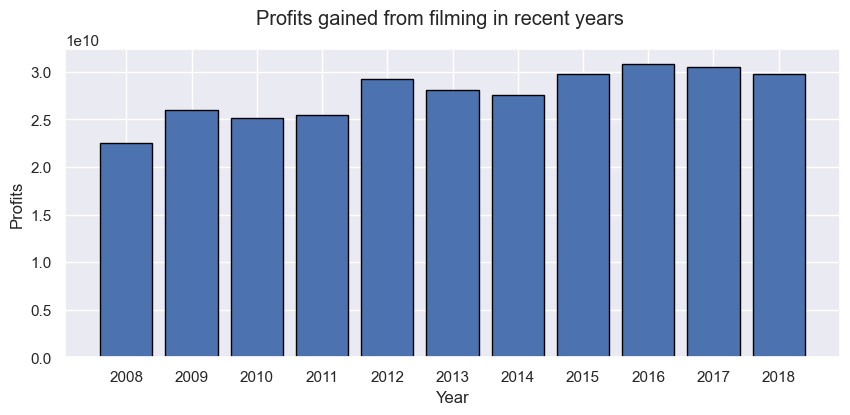

In [119]:
# Creating a bar graph to show the trends 
trends_fig,ax = plt.subplots(figsize =(10,4))
ax.bar(trends_df2['release_year'],trends_df2['Profits'],edgecolor = 'Black')
trends_fig.suptitle('Profits gained from filming in recent years')
ax.set_xlabel('Year')
ax.set_xticks(trends_df2['release_year'])
ax.set_ylabel('Profits')
plt.show();

From the bar graph it is observed that the profits gained from filming are high and the current trends show stability in the filming industry. Investing in filming is a good choice.